### Logistic regression for imbalnce dataset

In [17]:
from collections import Counter
from sklearn.datasets import make_classification
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [18]:
X,y=make_classification(n_samples=10000,n_features=2,n_informative=2,
                        n_redundant=0,n_clusters_per_class=1,weights=[0.99],random_state=10)

In [19]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [20]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

<Axes: >

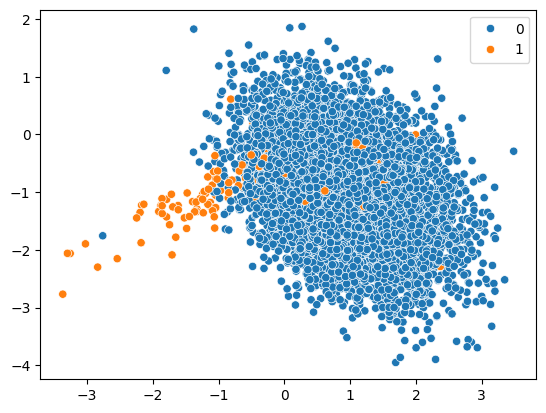

In [21]:
import seaborn as sns

sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y}for w in [1,10,50,100] for y in [1,10,50,100]]
parms=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)


In [24]:
parms

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [25]:
class_weight=[{0:w,1:y}for w in [1,10,50,100] for y in [1,10,50,100]]

class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [26]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

grid_search=GridSearchCV(estimator=model,param_grid=parms,n_jobs=-1,cv=cv,scoring='accuracy',)

In [27]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [29]:
grid_search.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [31]:
y_pred=grid_search.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from pprint import pprint

print('accuracy is :: ',accuracy_score(y_test,y_pred))

print('classification report is :: ',classification_report(y_test,y_pred))

print('confusion matrix is :: ',confusion_matrix(y_test,y_pred))




accuracy is ::  0.9888
classification report is ::                precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       0.68      0.37      0.48        35

    accuracy                           0.99      2500
   macro avg       0.84      0.68      0.74      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix is ::  [[2459    6]
 [  22   13]]
